In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy import stats
import statsmodels.api as sm

fileT = 'Gaussian_Decomp_Results/Temp-Dependence-Study.csv'

In [15]:
h = const.h
c = const.c
e = const.e

## Power Dependence Analysis

In [16]:
fileP = 'Gaussian_Decomp_Results/Power-Dependence-Study.csv'
df = pd.read_csv(fileP)
df.head()

,Filter,Amplitude_0,A0_err,Amplitude_1,A1_err
0,0.3,23708.500000,391.882195,7019.85000,116.511527
1,0.6,6625.747487,178.635356,1928.34924,47.878054


Slope (gamma) for Peak 1: 1.85 +/- 0.0
Slope (gamma) for Peak 2: 1.87 +/- 0.0
[10.07358891  8.79871847]


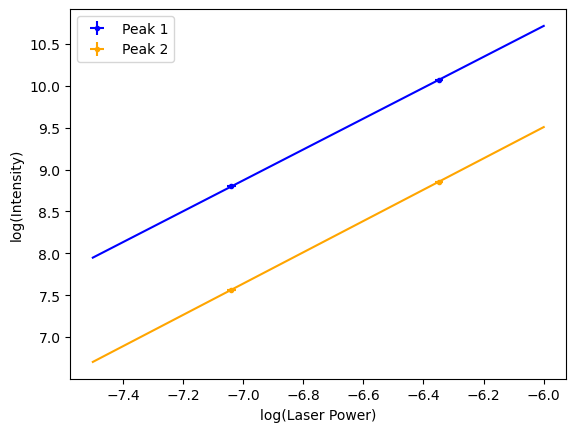

In [33]:
# Determine laser intensity through each filter
# using P = I_0 * 10**-(ND) and plot against
# amplitude on logarithmic scale

I_0 = 3.49E-3 # 5mW laser
dI_0 = 0.05E-3  # Uncertainty on laser power
powers = I_0 * 10**-(df['Filter'])  # Laser power [mW]
dpowers = dI_0 * 10 ** -(df['Filter'])  # propagates uncertainty on laser power

x = np.log(powers).to_numpy()
dx = (dpowers / powers).to_numpy()

y0 = np.log(df['Amplitude_0']).to_numpy()
dy0 = (df['A0_err'] / df['Amplitude_0']).to_numpy()

y1 = np.log(df['Amplitude_1']).to_numpy()
dy1 = (df['A1_err'] / df['Amplitude_1']).to_numpy()

# Fit linear regression via least squares
m0, b0, r, p, dm0 = stats.linregress(x, y0)
m1, b1, r, p, dm1 = stats.linregress(x, y1)
xseq = np.linspace(-7.5, -6, num=100)

fig = plt.figure()
ax = fig.add_subplot()
ax.errorbar(x, y0, xerr=dx, yerr=dy0, fmt='.', label="Peak 1", color="blue")
ax.errorbar(x, y1, xerr=dx, yerr=dy1, fmt='.', label="Peak 2", color="orange")
ax.plot(xseq, b0 + m0 * xseq, color="blue", lw=1.5)
ax.plot(xseq, b1 + m1 * xseq, color="orange", lw=1.5)

ax.set_xlabel('log(Laser Power)')
ax.set_ylabel('log(Intensity)')
ax.legend(loc=2)

print(f"Slope (gamma) for Peak 1: {np.around(m0, 2)} +/- {np.around(dm0, 2)}")
print(f"Slope (gamma) for Peak 2: {np.around(m1, 2)} +/- {np.around(dm1, 2)}")

print(y0)

In [46]:
m0_max = ((y0[-1] + dy0[-1]) - (y0[0] - dy0[0])) / (x[-1] - x[0])
m0_min = ((y0[-1] - dy0[-1]) - (y0[0] + dy0[0])) / (x[-1] - x[0])

m1_max = ((y1[-1] + dy1[-1]) - (y1[0] - dy1[0])) / (x[-1] - x[0])
m1_min = ((y1[-1] - dy1[-1]) - (y1[0] + dy1[0])) / (x[-1] - x[0])

print(f"m0 = {m0} +/- {m0_max - m0_min}")
print(f"m1 = {m1} +/- {m1_max - m1_min}")

m0 = 1.8455639906288506 +/- -0.12591636256680294
m1 = 1.870473804068121 +/- -0.11994042809438477


## Temperature Dependence Analysis

In [5]:
df = pd.read_csv(fileT)
df.head()

,Temp [K],Filter,FWHM_0,FWHM_0 err,FWHM_1,FWHM_1 err,Mean_0,Mean_0 err,Mean_1,Mean_1 err,Alpha,SNR
0,90,0.3,6.399823,0.093078,26.293688,0.225115,533.780406,0.041618,545.006791,0.154593,0.06,3.0
1,100,0.3,6.020000,0.070000,18.980000,0.210000,531.790000,0.030000,538.250000,0.120000,2.00,2.3
2,120,0.3,7.158989,0.079679,22.768934,0.239082,530.455165,0.032456,535.561732,0.119396,1.40,4.0
3,140,0.3,9.260000,0.107097,30.085200,0.355206,529.610000,0.043058,533.990000,0.163470,3.00,2.0
4,160,0.3,10.205773,0.273125,35.400000,1.070296,528.385676,0.089576,530.508733,0.328912,2.10,1.5


In [6]:
df['Mean_0'] = df['Mean_0'] * 1E-9  # convert to m
df['Mean_1'] = df['Mean_1'] * 1E-9 

   Temp [K]  Filter     FWHM_0  FWHM_0 err     FWHM_1  FWHM_1 err  \
0        90     0.3   6.399823    0.093078  26.293688    0.225115   
1       100     0.3   6.020000    0.070000  18.980000    0.210000   
2       120     0.3   7.158989    0.079679  22.768934    0.239082   
3       140     0.3   9.260000    0.107097  30.085200    0.355206   
4       160     0.3  10.205773    0.273125  35.400000    1.070296   
5       180     0.3  12.300000    0.242780  35.300000    0.653700   

         Mean_0  Mean_0 err        Mean_1  Mean_1 err  Alpha  SNR       E_0  \
0  5.337804e-07    0.041618  5.450068e-07    0.154593   0.06  3.0  2.322757   
1  5.317900e-07    0.030000  5.382500e-07    0.120000   2.00  2.3  2.331450   
2  5.304552e-07    0.032456  5.355617e-07    0.119396   1.40  4.0  2.337317   
3  5.296100e-07    0.043058  5.339900e-07    0.163470   3.00  2.0  2.341047   
4  5.283857e-07    0.089576  5.305087e-07    0.328912   2.10  1.5  2.346472   
5  5.280000e-07    0.088404  5.298000e-07 

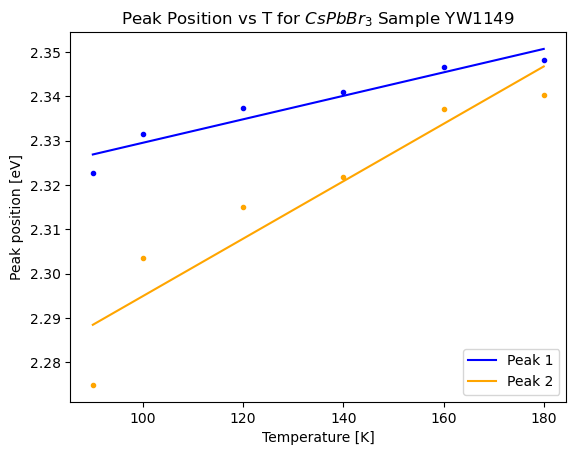

In [7]:
# Plot mean peak position as function of temp
# for the two gaussians. Expect linear relationship
fig = plt.figure()
ax = fig.add_subplot()

df['E_0'] = h * c / df['Mean_0'] / e  # Energy in eV E = hc/lda
df['E_1'] = h * c / df['Mean_1'] / e

df['dE_0'] = df['E_0'] ** -2 * h * c * df['Mean_0 err']
df['dE_1'] = df['E_1'] ** -2 * h * c * df['Mean_1 err']
print(df)

m0, b0 = np.polyfit(df['Temp [K]'], df['E_0'], deg=1)
m1, b1 = np.polyfit(df['Temp [K]'], df['E_1'], deg=1)
xseq = np.linspace(90, 180, num=100)

ax.errorbar(df['Temp [K]'], df['E_0'], yerr=df['dE_0'], fmt='.', label="Peak 1", color="blue")
ax.errorbar(df['Temp [K]'], df['E_1'], yerr=df['dE_1'], fmt='.', label="Peak 2", color="orange")
ax.plot(xseq, b0 + m0 * xseq, color="blue", lw=1.5,label=m0)
ax.plot(xseq, b1 + m1 * xseq, color="orange", lw=1.5,label=m1)

ax.set_xlabel('Temperature [K]')
ax.set_ylabel('Peak position [eV]')
ax.set_title("Peak Position vs T for $CsPbBr_3$ Sample YW1149")
ax.legend(["Peak 1", "Peak 2"], loc='lower right')

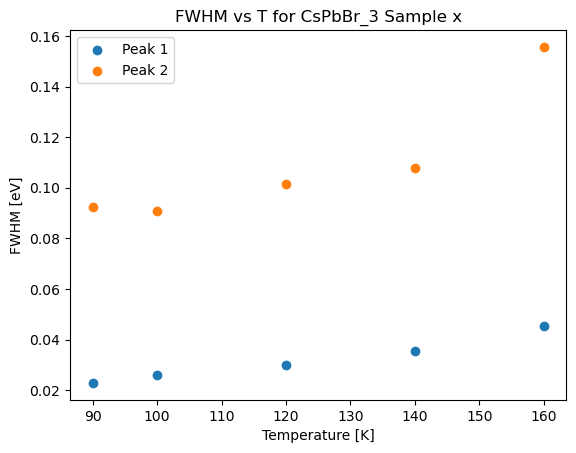

In [35]:
# Plot FWHM as function of temp
# Plot mean peak position as function of temp
# for the two gaussians. Expect linear relationship
fig = plt.figure()
ax = fig.add_subplot()

# Get the linewidth in terms of energy
df['lw_0'] = (h * c / (df['Mean_0'] - df['FWHM_0'] / 2) - h * c / (df['Mean_0'] + df['FWHM_0'] / 2)) / 1E-9  # Energy in J E = hc / lda
df['lw_1'] = (h * c / (df['Mean_1'] - df['FWHM_1'] / 2) - h * c / (df['Mean_1'] + df['FWHM_1'] / 2)) / 1E-9

ax.scatter(df['Temp [K]'][:5], df['lw_0'][:5] / e, label="Peak 1")
ax.scatter(df['Temp [K]'][:5], df['lw_1'][:5] / e, label="Peak 2")


ax.set_xlabel('Temperature [K]')
ax.set_ylabel('FWHM [eV]')
ax.set_title("FWHM vs T for CsPbBr_3 Sample x")
ax.legend()

We aim to fit the data above using $\omega(T) = \frac{A}{exp(E_p/K_BT)-1}+C$ to determine $E_p$, the energy of the phonon.

[0.49196027 0.24704325 0.02150053]
0.24704324743903058


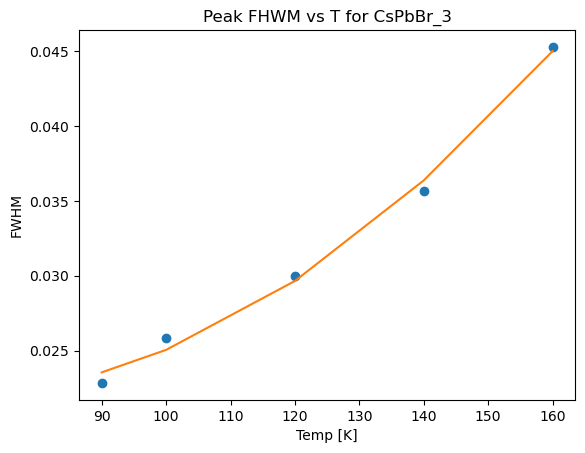

In [37]:
from scipy.optimize import curve_fit

# TODO - convert to eV and rescale
# Issue with overflow using K_B true values
#K_B = 1.38*6.23*10**(-10) # in eV/K
K=0.0005
def Toyozawa(T,A,E_p,C):
    exp = np.exp(E_p/(K*T))
    omega = (A/(exp-1))+C
    return omega

guess = [0.2, 0.015,0.02]
parameters, covariance = curve_fit(Toyozawa, df['Temp [K]'][:5], df['lw_0'][:5] / e, p0=guess)
fit_A = parameters[0]
fit_Ep = parameters[1]
fit_C = parameters[2]
print(parameters)

fit = Toyozawa(df['Temp [K]'][:5], fit_A, fit_Ep,fit_C)

plt.plot(df['Temp [K]'][:5], df['lw_0'][:5] / e, 'o', label='data')
plt.plot(df['Temp [K]'][:5], fit, '-', label='fit')
plt.title("Peak FHWM vs T for CsPbBr_3")
plt.xlabel("Temp [K]")
plt.ylabel("FWHM")

print(fit_Ep)

TODO - Add thermal quenching model analysis

In [101]:
def thermal_quenching(T,E1,E2,C1,C2,I_0):
    return I_0/(1+C1*np.exp(-E1/(K*T))+C2*np.exp(-E2/(K*T)))